## Latency Arbitrage

This notebook runs the core experiment of the project. The experiment varies the slow trader's information latency and measures how expected PnL changes under repeated Monte Carlo simulations

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt

from core.experiments import latency_sweep

### Design

The experiment below simulates a market with a single latent value process and a naive market maker posting quotes based on lagged information.

Two traders interact with the market:
- A fast trader who observes information immediately.
- A slow trader who observes the same information with a fixed delay.

Both traders follow similar rational decision rules with fast trader acting with lesser confidence in probability (30%) compared to slow trader (50%) for a positive payout.

In [2]:
# Simulation parameters
T = 2000
sigma = 0.2
spread = 0.5
base_depth = 10.0
impact_coeff = 0.01
agg_window = 10

# Experiment parameters
latencies = [0, 1, 2, 3, 5, 8, 13, 21]
n_runs = 100

In [3]:
results = latency_sweep(
    T=T,
    sigma=sigma,
    spread=spread,
    base_depth=base_depth,
    impact_coeff=impact_coeff,
    latencies=latencies,
    n_runs=n_runs,
    agg_window=agg_window
)

pd.options.display.float_format = '{:.2f}'.format
print(results)

   latency  fast_mean  fast_std  slow_mean  slow_std  mm_mean  advantage_mean
0        0    -111.98    145.95     -14.37     59.31    -0.96          -97.61
1        1    -111.98    145.95     -85.21    181.06    -0.09          -26.77
2        2    -111.98    145.95    -607.76    517.08     0.65          495.77
3        3    -111.98    145.95   -2112.50   1204.19     7.36         2000.52
4        5    -111.98    145.95   -7621.48   3089.56    30.09         7509.50
5        8    -111.98    145.95  -18641.53   5811.26    57.69        18529.55
6       13    -111.98    145.95  -36178.53   9933.76   119.88        36066.55
7       21    -111.98    145.95  -57554.37  15222.43   212.36        57442.38


### Understanding the Results

The table above and plot below should be read as follows:

- The **fast trader's mean PnL** is invariant to slow trader's latency.
- The **slow trader's mean PnL** deteriorates monotonically as latency increases.
- The **PnL advantage (fast - slow)** grows rapidly with information delay.

Absolute PnL levels are negative due to transaction costs in a fair market. The experiment focuses on relative advantage created purely by information timing.

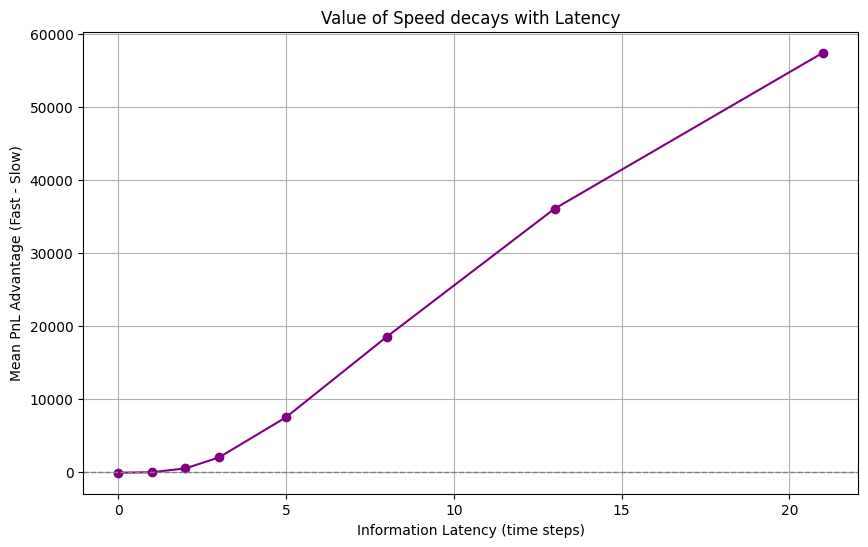

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(
    results["latency"],
    results["advantage_mean"],
    marker="o",
    color="purple",
)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)

plt.xlabel("Information Latency (time steps)")
plt.ylabel("Mean PnL Advantage (Fast - Slow)")
plt.title("Value of Speed decays with Latency")
plt.grid(True)
plt.show()

### Interpretation

The results show that speed creates value only in realtive terms.

In a fair market with transaction costs, neither trader ears positive expected PnL in isolation. However, as information becomes stale, the slow trader's losses grow rapidly while the fast trader's losses remain bounded.

The widening gap quantifies the economic value of speed: faster access to information reduces adverse selection and limits exposure to stale prices.